<center> <img src ="https://i.postimg.cc/1X8H7YYt/BITS-Logo.png" width = "400" alt="BITS Pilani Logo" /> </center>

<font color='green'> <h1> <center> Basic Plotting </center> </h1> </font>

Lets import the bike rental dataset and do some basic graph plotting with it. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bikes = pd.read_csv("bike_shairing_hourly.csv")

In [ ]:
bikes.head(2)

In [ ]:
bikes.columns

Lets transform the "dteday" column to datetime column and then extract "year" out of it. Then append it to the data frame.

In [3]:
dte = pd.to_datetime(bikes.dteday)

In [4]:
year = dte.dt.year

In [5]:
bikes["year"] = year

In [6]:
bikes["year"].head(2)

0    2011
1    2011
Name: year, dtype: int64

Lets do some basic data exploration with the data frame.

In [ ]:
bikes.columns

<b> Univariate Analysis <b>

Just see what happens if only one column is plotted using matplotlib.

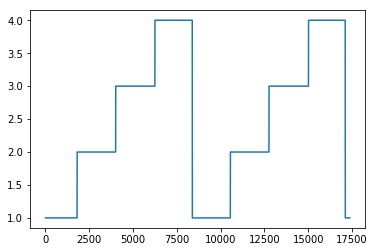

In [7]:
plt.plot(bikes.season)
plt.show()

Here x axis is basically showing the index values associated with season feature and y axis showing four season values 1, 2, 3, 4 for all 17000 plus records. But nothing meaningful is dervied out of it.

Lets try plotting newly created year column.

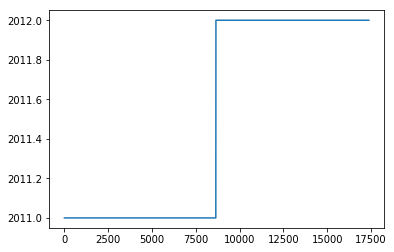

In [8]:
plt.plot(bikes.year)
plt.show()

Again x axis showing record index values and y axis showing year values 2011 and 2012. But again nothing meaningfull is derived out of it.

Lets try to plot the real attributes.

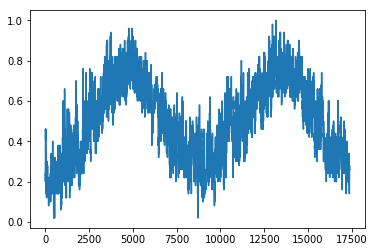

In [9]:
plt.plot(bikes.temp)

This shows that there is symmetry between the temp values captured over both years.

Lets explore user counts. 

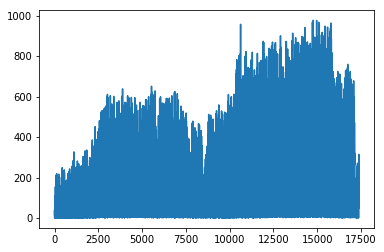

In [10]:
plt.plot(bikes.cnt)

There are more number of users who have used service in year 2012 as compared to the ones who have used it in year 2011.

Lets see does plotting two different user types reveals some interesting information or not.

In [ ]:
plt.plot(bikes.casual)

In [ ]:
plt.plot(bikes.registered)

In both cases, more casual and registered users have utilized the services in year 2012 as compared to year 2011.

<b> Bivariate analysis<b>

Lets see how we can compare two features using same plot. Compare count of users against each day.

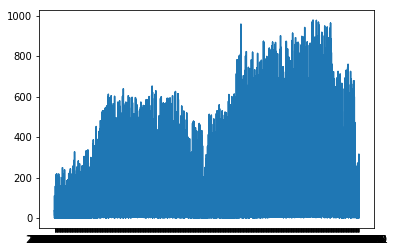

In [11]:
plt.plot(bikes.dteday, bikes.cnt)

x axis showcasing the each day whereas y axis showcasing the number of users who utilised these services.

Lets compare another pair of variables. Season against user counts.

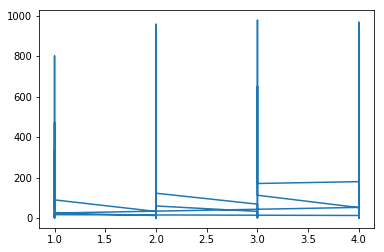

In [12]:
plt.plot(bikes.season, bikes.cnt)

But this plot does not reveal exactly how many users used the service in each season. May be some group by needs to be applied here.

In [13]:
df_by_season = bikes.groupby("season")
df_by_season.cnt.sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

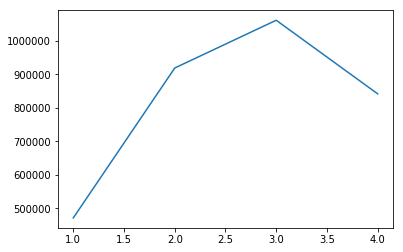

In [14]:
plt.plot(bikes.season.unique(), df_by_season.cnt.sum())

Seems the more users preferes to use serive in season 3 i.e. fall.

Lets check the yearly trends.

In [15]:
df_by_year = bikes.groupby(["year"])

In [16]:
df_by_year.cnt.sum()

year
2011    1243103
2012    2049576
Name: cnt, dtype: int64

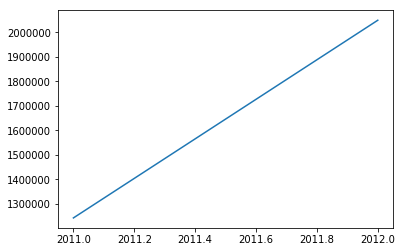

In [17]:
plt.plot(df_by_year.year.unique(), df_by_year.cnt.sum())

Lets explore monthly and hourly trends.

In [18]:
df_months = bikes.groupby("mnth")
df_months.cnt.sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

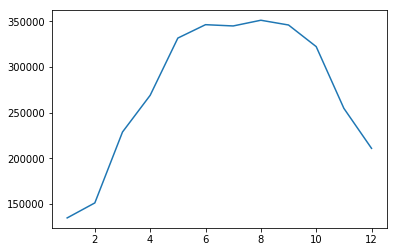

In [19]:
plt.plot(df_months.cnt.sum())

Usually between June to Sept users uses the service most.

In [20]:
df_hours = bikes.groupby("hr")
df_hours.cnt.sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

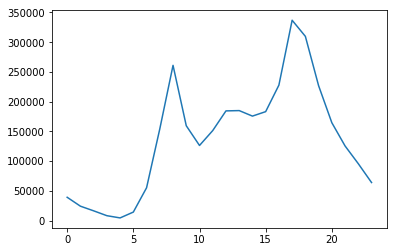

In [21]:
plt.plot(df_hours.cnt.sum())

Usually during morning and afternoon hours most users uses the service. Whereas during early morning hours least number of users uses the service.

Lets do some comparison based on the averages.

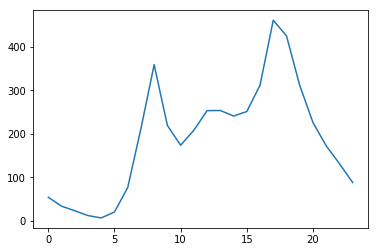

In [22]:
plt.plot(df_hours.cnt.mean())

This hourly average users trends looks very similar to the earlier computed hourly trend using total number of users.

# Understanding Plot Components

Just looking at all above plots, its very difficult to read the plot without looking at the python code that has produced it. It makes perfect sense to introuce some basic components in these plots like axis labels, graph title etc.

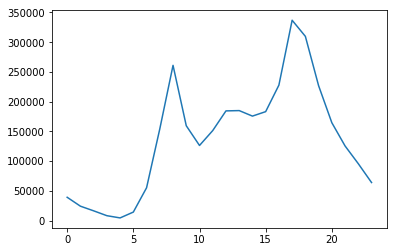

In [23]:
plt.plot(bikes.hr.unique(), df_hours.cnt.sum())

Text(0.5, 1.0, 'Hourly user trend')

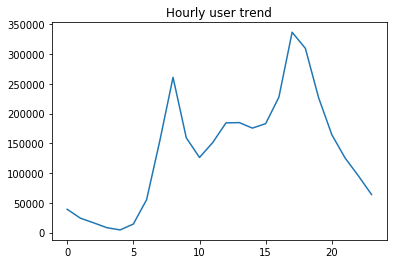

In [24]:
plt.plot(bikes.hr.unique(), df_hours.cnt.sum())
plt.title("Hourly user trend")

Text(0, 0.5, 'sum(users)')

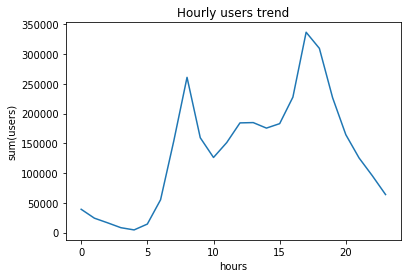

In [25]:
plt.plot(bikes.hr.unique(), df_hours.cnt.sum())
plt.title("Hourly users trend")
plt.xlabel("hours")
plt.ylabel("sum(users)")

Adding some gridlines can make reading of plot simpler.

In [ ]:
plt.plot(bikes.hr.unique(), df_hours.cnt.sum())
plt.title("Hourly users trend")
plt.xlabel("hours")
plt.ylabel("sum(users)")
plt.grid(True)

May be puttling up a legend can also increase the readability of the graph.

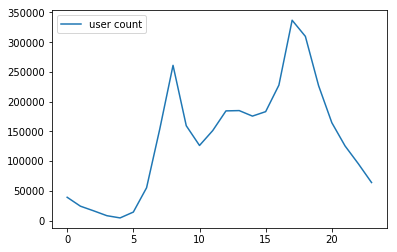

In [26]:
plt.plot(bikes.hr.unique(), df_hours.cnt.sum(), label="user count")
plt.legend()